## Geographycal and Seasonal Marketing Insights
 

 # 1.Project Objectives Summary
The goal of this analysis is to uncover geographical and seasonal patterns in movie box office performance to support strategic decision-making for film releases.

Key Objectives:

1. Compare domestic vs. international box office revenues to identify films with global or regional appeal.

2. Determine the best-performing release months and seasons based on historical revenue trends.

3. Spot seasonal trends to guide future movie release schedules for maximum profitability.

# 2. Data Analysis
This will be considerd a success when we are  able to effectively determined the movie company to purchase and start this new business

In [4]:
# Run this cell without changes
import pandas as pd                  
import numpy as np                   
import sqlite3                       
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# 3. Data Reading

In [88]:
import sqlite3
import pandas as pd

# Connect to your database
conn = sqlite3.connect('cleaned_imdb.db')

# Check available tables
tables = pd.read_sql_query("""SELECT *
                              FROM sqlite_master 
                              WHERE type='table';""", conn)

print(tables)


     type                  name              tbl_name  rootpage  \
0   table          movie_basics          movie_basics         2   
1   table             directors             directors      3435   
2   table             known_for             known_for      4521   
3   table            movie_akas            movie_akas     15400   
4   table         movie_ratings         movie_ratings     18362   
5   table               persons               persons     18862   
6   table            principals            principals     25822   
7   table               writers               writers     35238   
8   table  actors_and_actresses  actors_and_actresses     36422   
9   table        movie_revenues        movie_revenues     41205   
10  table    production_budgets    production_budgets     41270   

                                                  sql  
0   CREATE TABLE "movie_basics" (\n"movie_id" TEXT...  
1   CREATE TABLE "directors" (\n"movie_id" TEXT,\n...  
2   CREATE TABLE "known_for

In [7]:
# loading the data set
import sqlite3
import pandas as pd
pd.read_sql_query("SELECT * FROM movie_basics LIMIT 5;", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,1970-01-01 00:00:00.000002,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,1970-01-01 00:00:00.000002,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,1970-01-01 00:00:00.000002,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,1970-01-01 00:00:00.000002,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,1970-01-01 00:00:00.000002,80.0,"Comedy,Drama,Fantasy"


In [8]:
pd.read_sql_query("SELECT * FROM actors_and_actresses LIMIT 5;", conn)

,movie_id,ordering,person_id,category,characters
0,tt0111414,1,nm0246005,actor,"[""The Man""]"
1,tt0323808,1,nm3579312,actress,"[""Beth Boothby""]"
2,tt0323808,2,nm2694680,actor,"[""Steve Thomson""]"
3,tt0323808,3,nm0574615,actor,"[""Sir Lachlan Morrison""]"
4,tt0323808,4,nm0502652,actress,"[""Lady Delia Morrison""]"


In [9]:
pd.read_sql_query("SELECT * FROM  movie_revenues  LIMIT 5;", conn)

,title,domestic_gross($),worldwide_gross($)
0,Toy Story 3,415000000.0,652000000.0
1,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0
2,Shrek Forever After,238700000.0,513900000.0
3,The Twilight Saga: Eclipse,300500000.0,398000000.0
4,Tangled,200800000.0,391000000.0


In [10]:
pd.read_sql_query("SELECT * FROM  production_budgets LIMIT 5;", conn)

,movie,production_budget($)
0,Avatar,425000000
1,Pirates of the Caribbean: On Stranger Tides,410600000
2,Dark Phoenix,350000000
3,Avengers: Age of Ultron,330600000
4,Star Wars Ep. VIII: The Last Jedi,317000000


In [11]:
pd.read_sql_query("SELECT * FROM  directors LIMIT 5;", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0878654,nm0089502
4,tt0878654,nm2291498


In [12]:
pd.read_sql_query("SELECT * FROM known_for LIMIT 5;", conn)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [13]:
pd.read_sql_query("SELECT * FROM movie_ratings  LIMIT 5;", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [89]:
pd.read_sql_query("SELECT * FROM  movie_akas   LIMIT 5;", conn)

,movie_id,ordering,title,region,is_original_title
0,tt0369610,10,Джурасик свят,BG,0.0
1,tt0369610,11,Jurashikku warudo,JP,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,0.0
4,tt0369610,14,Jurassic World,FR,0.0


In [90]:
pd.read_sql_query("SELECT * FROM  writers   LIMIT 5;", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [16]:
pd.read_sql_query("SELECT * FROM   principals  LIMIT 5;", conn)

,movie_id,ordering,person_id,category
0,tt0111414,1,nm0246005,actor
1,tt0111414,2,nm0398271,director
2,tt0111414,3,nm3739909,producer
3,tt0323808,10,nm0059247,editor
4,tt0323808,1,nm3579312,actress


In [17]:
pd.read_sql_query("SELECT * FROM   persons  LIMIT 5;", conn)

,person_id,primary_name,primary_profession
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator"


In [24]:
bom = pd.read_csv("bom.movie_gross.csv")
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [19]:
tmdb = pd.read_csv("tmdb.movies.csv")
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


# 3. Checking the Data

In [91]:
# checking data
print(bom.head(5))

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year                                  title_clean  
0     652000000  2010                                  toy story 3  
1     691300000  2010                   alice in wonderland (2010)  
2     664300000  2010  harry potter and the deathly hallows part 1  
3     535700000  2010                                    inception  
4     513900000  2010                          shrek forever after  


In [92]:
# checking unique values
bom.isnull

<bound method DataFrame.isnull of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700

In [93]:
# identifying the missing data
bom.isna().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
title_clean          0
dtype: int64

In [94]:
release_dates = pd.read_sql_query("SELECT * FROM movie_basics", conn)


In [95]:
merged_df = pd.merge(
    bom, 
    release_dates, 
    left_on='title', 
    right_on='primary_title', 
    how='inner'
)
merged_df.head()

,title,studio,domestic_gross,foreign_gross,year,title_clean,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,toy story 3,tt0435761,Toy Story 3,Toy Story 3,1970-01-01 00:00:00.000002,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,inception,tt1375666,Inception,Inception,1970-01-01 00:00:00.000002,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,shrek forever after,tt0892791,Shrek Forever After,Shrek Forever After,1970-01-01 00:00:00.000002,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,the twilight saga: eclipse,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,1970-01-01 00:00:00.000002,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,iron man 2,tt1228705,Iron Man 2,Iron Man 2,1970-01-01 00:00:00.000002,124.0,"Action,Adventure,Sci-Fi"


In [96]:
release_dates = pd.read_sql_query("SELECT primary_title, start_year FROM movie_basics", conn)

In [97]:
gross_by_year = merged_df.groupby('start_year')[['domestic_gross', 'foreign_gross']].sum().reset_index()
gross_by_year.head()

,start_year,domestic_gross,foreign_gross
0,1970-01-01 00:00:00.000002,9.808446e+10,6520000005357000005139000003980000003115000003...


# 4. Data  Analysis

In [98]:
import pandas as pd

# Load your dataframes
tmdb = pd.read_csv('tmdb.movies.csv')
bom = pd.read_csv('bom.movie_gross.csv')

# Extract year from release_date
tmdb['year'] = pd.to_datetime(tmdb['release_date'], errors='coerce').dt.year

# Normalize titles: lower and strip whitespace for joining
tmdb['title_clean'] = tmdb['title'].str.lower().str.strip()
bom['title_clean'] = bom['title'].str.lower().str.strip()

# Merge on title and year
merged = pd.merge(tmdb, bom, left_on=['title_clean', 'year'], right_on=['title_clean', 'year'], how='inner')

merged = pd.merge(
    tmdb, bom, 
    left_on=['title_clean', 'year'], 
    right_on=['title_clean', 'year'], 
    how='inner', 
    suffixes=('', '_bom')
)
print(merged.columns)
# View merged data
print(merged[['title', 'year', 'vote_average', 'vote_count', 'domestic_gross', 'foreign_gross']].head())


Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'year', 'title_clean', 'title_bom', 'studio', 'domestic_gross',
       'foreign_gross'],
      dtype='object')
                                               title  year  vote_average  \
0                           How to Train Your Dragon  2010           7.7   
1                                         Iron Man 2  2010           6.8   
2                                          Inception  2010           8.3   
3  Percy Jackson & the Olympians: The Lightning T...  2010           6.1   
4                                        Toy Story 3  2010           7.7   

   vote_count  domestic_gross foreign_gross  
0        7610     217600000.0     277300000  
1       12368     312400000.0     311500000  
2       22186     292600000.0     535700000  
3        4229      88800000.0     137700000  
4        8340     415000000.0     652000

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your tmdb movies dataset
tmdb = pd.read_csv('tmdb.movies.csv')

# Convert release_date to datetime
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'], errors='coerce')

# Extract year and month
tmdb['release_year'] = tmdb['release_date'].dt.year
tmdb['release_month'] = tmdb['release_date'].dt.month


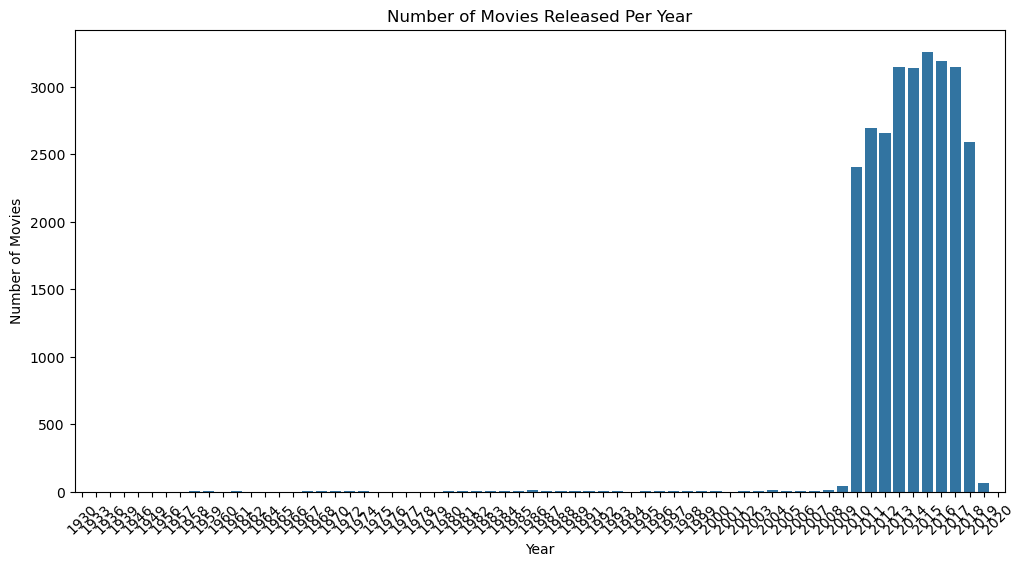

In [100]:
# Number of Movies Released Per Year
plt.figure(figsize=(12,6))
sns.countplot(data=tmdb, x='release_year', order=tmdb['release_year'].value_counts().sort_index().index)
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


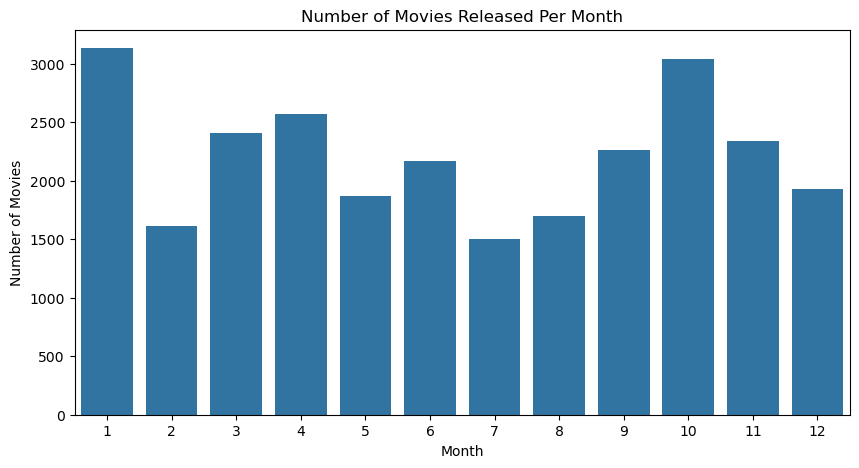

In [35]:
#Number of Movies Released Per Month
plt.figure(figsize=(10,5))
sns.countplot(data=tmdb, x='release_month')
plt.title('Number of Movies Released Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.show()


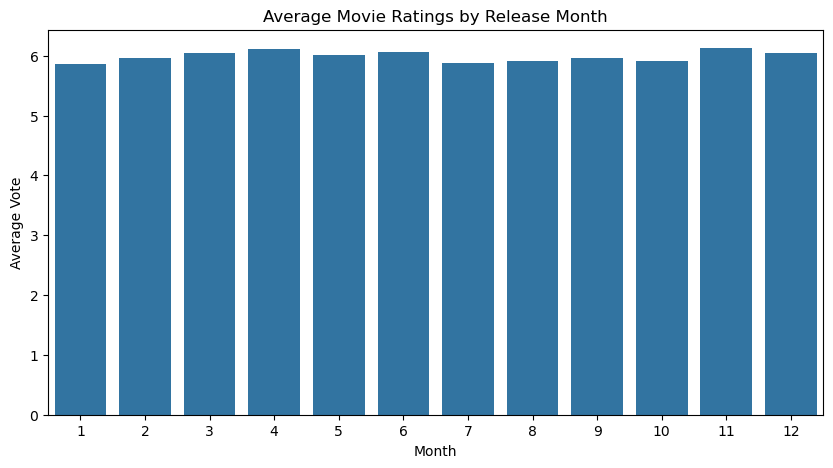

In [36]:
# Average Vote Average by Month
avg_votes_by_month = tmdb.groupby('release_month')['vote_average'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=avg_votes_by_month, x='release_month', y='vote_average')
plt.title('Average Movie Ratings by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Vote')
plt.show()


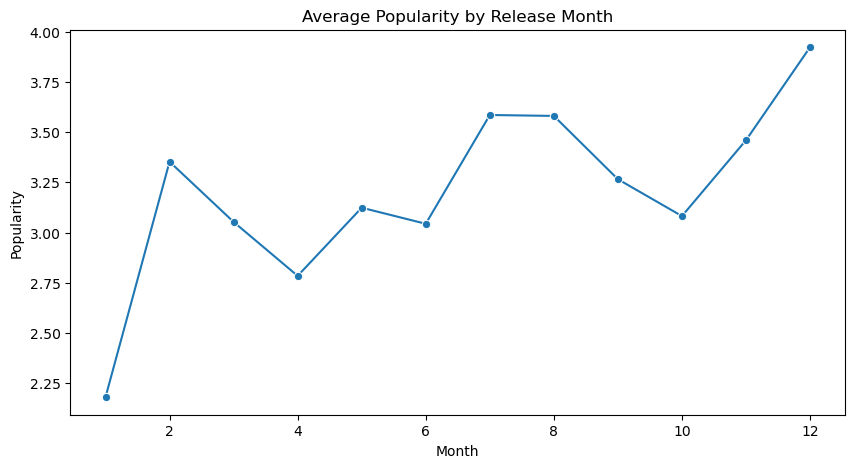

In [37]:
#Popularity Trend by Month
popularity_by_month = tmdb.groupby('release_month')['popularity'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=popularity_by_month, x='release_month', y='popularity', marker='o')
plt.title('Average Popularity by Release Month')
plt.xlabel('Month')
plt.ylabel('Popularity')
plt.show()


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
tmdb = pd.read_csv('tmdb.movies.csv')

# Convert release_date to datetime
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'], errors='coerce')

# Extract release year
tmdb['release_year'] = tmdb['release_date'].dt.year

# Create a 'decade' column
tmdb['decade'] = (tmdb['release_year'] // 10) * 10


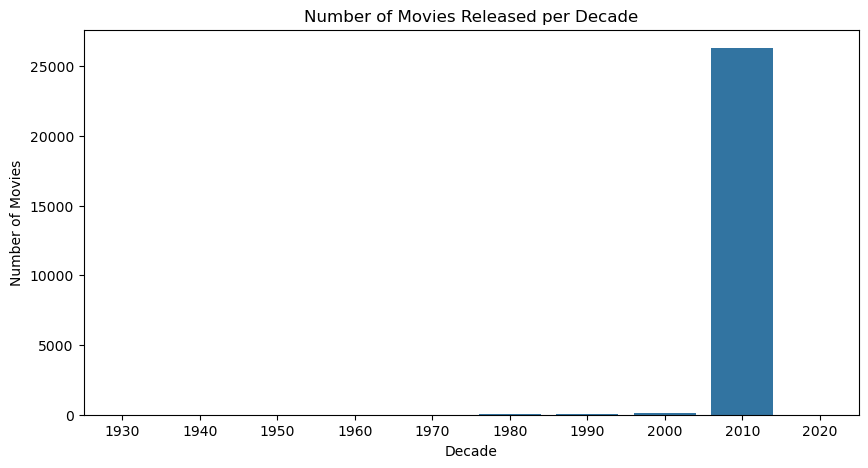

In [39]:
# Number of Movies Released Per Decade
plt.figure(figsize=(10,5))
sns.countplot(data=tmdb, x='decade', order=sorted(tmdb['decade'].dropna().unique()))
plt.title('Number of Movies Released per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.show()


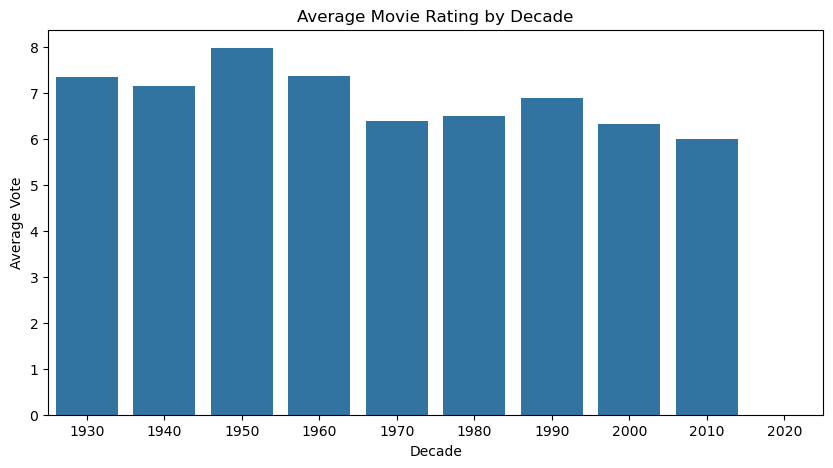

In [40]:
# Average Rating (vote_average) per Decade
avg_rating_decade = tmdb.groupby('decade')['vote_average'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=avg_rating_decade, x='decade', y='vote_average')
plt.title('Average Movie Rating by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Vote')
plt.show()


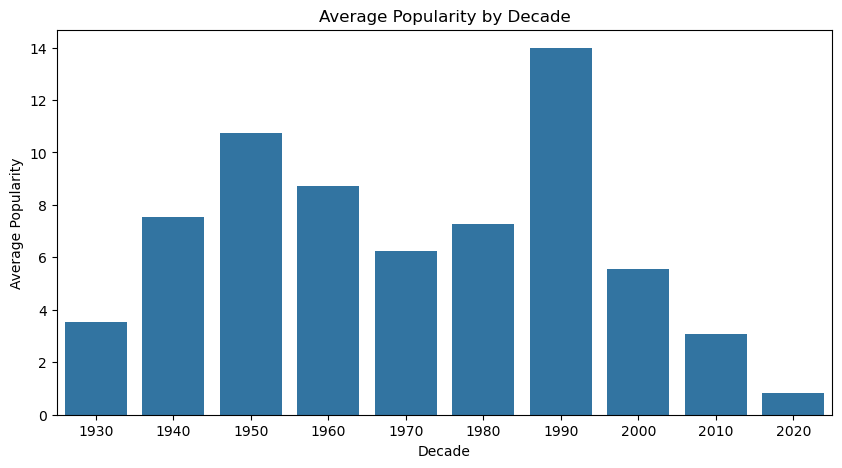

In [41]:
# Average Popularity per Decade
avg_popularity_decade = tmdb.groupby('decade')['popularity'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=avg_popularity_decade, x='decade', y='popularity')
plt.title('Average Popularity by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Popularity')
plt.show()


In [101]:
# Gross by Year
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the bom.movie_gross CSV
bom = pd.read_csv('bom.movie_gross.csv')

# Convert year to numeric (if needed)
bom['year'] = pd.to_numeric(bom['year'], errors='coerce')

# Convert gross values to numeric (if stored as string with commas, etc.)
bom['domestic_gross'] = pd.to_numeric(bom['domestic_gross'], errors='coerce')
bom['foreign_gross'] = pd.to_numeric(bom['foreign_gross'], errors='coerce')

# Create worldwide_gross column
bom['worldwide_gross'] = bom['domestic_gross'] + bom['foreign_gross']


   year  domestic_gross  foreign_gross  worldwide_gross
0  2010    1.015693e+10   1.437426e+10     2.452551e+10
1  2011    1.006416e+10   1.567099e+10     2.558193e+10
2  2012    1.087661e+10   1.703789e+10     2.770085e+10
3  2013    1.079233e+10   1.661239e+10     2.713909e+10
4  2014    1.033774e+10   1.697197e+10     2.710465e+10


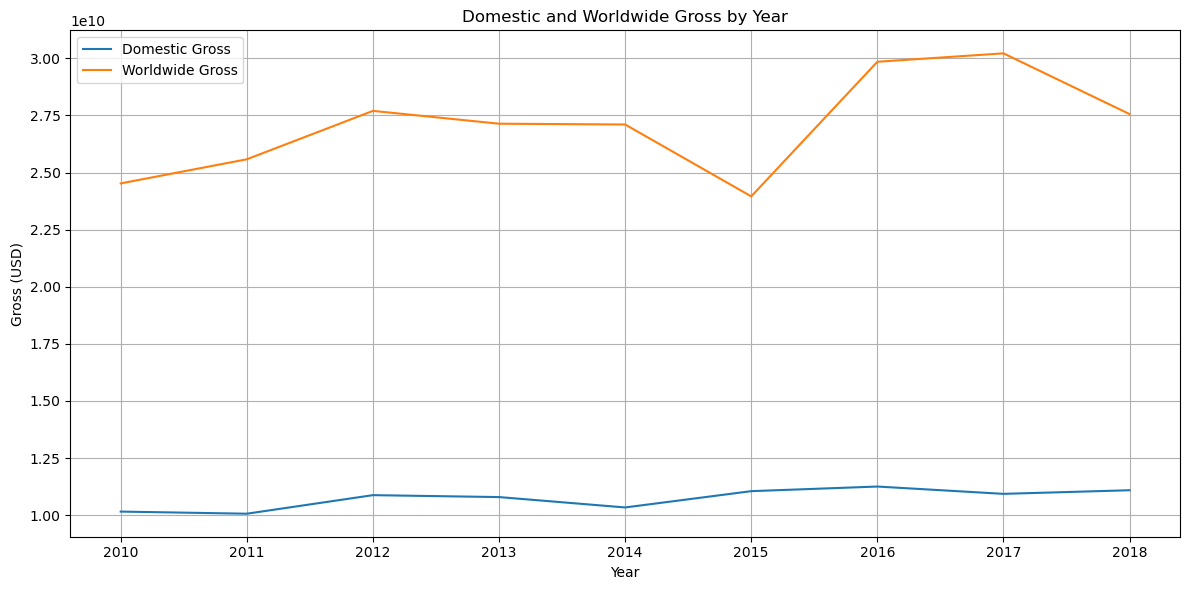

In [102]:
gross_by_year = bom.groupby('year').agg({
    'domestic_gross': 'sum',
    'foreign_gross': 'sum',
    'worldwide_gross': 'sum'
}).reset_index()

print(gross_by_year.head())

plt.figure(figsize=(12,6))
sns.lineplot(data=gross_by_year, x='year', y='domestic_gross', label='Domestic Gross')
sns.lineplot(data=gross_by_year, x='year', y='worldwide_gross', label='Worldwide Gross')
plt.title('Domestic and Worldwide Gross by Year')
plt.xlabel('Year')
plt.ylabel('Gross (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [103]:
import pandas as pd

# Load TMDb movies data
tmdb = pd.read_csv('tmdb.movies.csv')

# Convert release_date to datetime
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'], errors='coerce')

# Drop rows with missing release dates
tmdb = tmdb.dropna(subset=['release_date'])

# Function to assign seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a season column
tmdb['season'] = tmdb['release_date'].dt.month.apply(get_season)


   season  number_of_movies
0    Fall              7637
1  Spring              6837
2  Winter              6675
3  Summer              5368


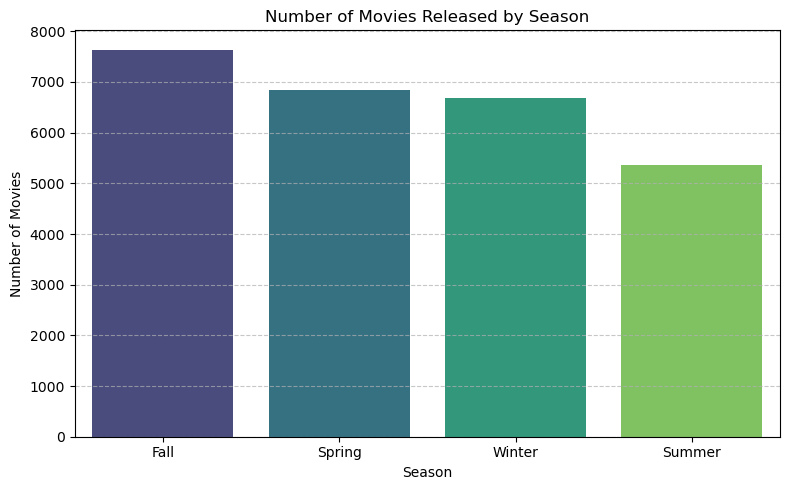

In [104]:
movies_by_season = tmdb['season'].value_counts().reset_index()
movies_by_season.columns = ['season', 'number_of_movies']

print(movies_by_season)

import seaborn as sns
import matplotlib.pyplot as plt

# Barplot of movie counts by season
plt.figure(figsize=(8,5))
sns.barplot(data=movies_by_season, x='season', y='number_of_movies', palette='viridis')
plt.title('Number of Movies Released by Season')
plt.xlabel('Season')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [105]:
import pandas as pd

# Load datasets
bom = pd.read_csv('bom.movie_gross.csv')
tmdb = pd.read_csv('tmdb.movies.csv')

# Convert release_date to datetime
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'], errors='coerce')

# Clean titles for merging
bom['title_clean'] = bom['title'].str.lower().str.strip()
tmdb['title_clean'] = tmdb['title'].str.lower().str.strip()

# Merge on title
merged = pd.merge(tmdb, bom, on='title_clean', how='inner')

# Extract month from release date
merged['release_month'] = merged['release_date'].dt.month

# Function to assign seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply season function
merged['season'] = merged['release_month'].apply(get_season)

# Domestic gross by month
domestic_by_month = merged.groupby('release_month')['domestic_gross'].sum().reset_index()

print(domestic_by_month)


    release_month  domestic_gross
0               1    4.595610e+09
1               2    6.617968e+09
2               3    6.259288e+09
3               4    5.144391e+09
4               5    9.012575e+09
5               6    1.122750e+10
6               7    9.384915e+09
7               8    5.946663e+09
8               9    6.218388e+09
9              10    5.348452e+09
10             11    1.402499e+10
11             12    1.658050e+10


   season  domestic_gross
0    Fall    2.559183e+10
1  Spring    2.041625e+10
2  Summer    2.655908e+10
3  Winter    2.779408e+10


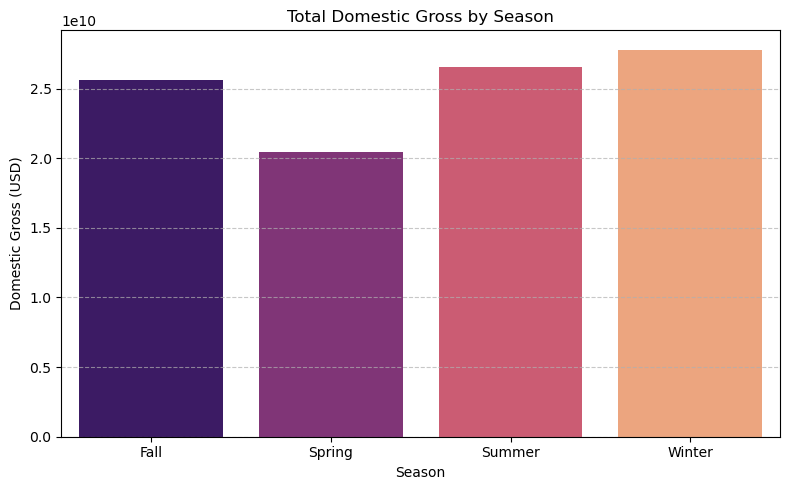

In [106]:
# Group by season and sum domestic gross
domestic_by_season = merged.groupby('season')['domestic_gross'].sum().reset_index()

# Preview it
print(domestic_by_season)

import seaborn as sns
import matplotlib.pyplot as plt

# Barplot for domestic gross by season
plt.figure(figsize=(8,5))
sns.barplot(data=domestic_by_season, x='season', y='domestic_gross', palette='magma')
plt.title('Total Domestic Gross by Season')
plt.xlabel('Season')
plt.ylabel('Domestic Gross (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


From the above 

In [107]:
# Load the 'directors' table into a DataFrame
directors = pd.read_sql_query("SELECT * FROM directors", conn)

# Load the 'actors' table into a DataFrame
actors = pd.read_sql_query("SELECT * FROM actors_and_actresses", conn)

# Load the 'ratings' table into a DataFrame
ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)

# Load the 'movie_revenue' table into a DataFrame
revenue = pd.read_sql_query("SELECT * FROM movie_revenues", conn)

# Load the 'writers' table into a DataFrame
writers = pd.read_sql_query("SELECT * FROM writers", conn)

# Load the 'movie_basics' table into a DataFrame
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)

# Load the 'persons' table into a DataFrame
persons = pd.read_sql_query("SELECT * FROM persons", conn)

# Load the 'principals' table into a DataFrame
principals = pd.read_sql_query("SELECT * FROM principals", conn)



In [50]:
print(directors.columns)
print(actors.columns)
print(ratings.columns)
print(revenue.columns)
print(writers.columns)
print(movie_basics.columns)
print(persons.columns)
print(principals.columns)


Index(['movie_id', 'person_id'], dtype='object')
Index(['movie_id', 'ordering', 'person_id', 'category', 'characters'], dtype='object')
Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')
Index(['title', 'domestic_gross($)', 'worldwide_gross($)'], dtype='object')
Index(['movie_id', 'person_id'], dtype='object')
Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
Index(['person_id', 'primary_name', 'primary_profession'], dtype='object')
Index(['movie_id', 'ordering', 'person_id', 'category'], dtype='object')


In [108]:
# Merge directors with ratings
directors_ratings = directors.merge(ratings, on='movie_id', how='left')

# Merge with movie_basics to get titles for merging with revenue
directors_ratings = directors_ratings.merge(movie_basics[['movie_id', 'primary_title']], on='movie_id', how='left')

# Merge with revenue using movie title
directors_full = directors_ratings.merge(revenue, left_on='primary_title', right_on='title', how='left')

# Merge with persons to get director names
directors_full = directors_full.merge(persons, on='person_id', how='left')

# Group by director and calculate average rating and total revenue
top_directors = (
    directors_full.groupby('primary_name')
    .agg(avg_rating=('averagerating', 'mean'),
         total_domestic_gross=('domestic_gross($)', 'sum'),
         total_worldwide_gross=('worldwide_gross($)', 'sum'),
         movie_count=('movie_id', 'count'))
    .sort_values(by='avg_rating', ascending=False)
    .head(20)
    .reset_index()
)

print(top_directors)


              primary_name  avg_rating  total_domestic_gross  \
0             Stephen Peek        10.0                   0.0   
1              Ivana Diniz        10.0                   0.0   
2         Loreto Di Cesare        10.0                   0.0   
3   Tristan David Luciotti        10.0                   0.0   
4        Masahiro Hayakawa        10.0                   0.0   
5                Emre Oran        10.0                   0.0   
6         Lindsay Thompson        10.0                   0.0   
7           Chad Carpenter        10.0                   0.0   
8         Michiel Brongers        10.0                   0.0   
9            Andrew Jezard         9.9                   0.0   
10            Kalyan Varma         9.9                   0.0   
11        Nagaraja Uppunda         9.9                   0.0   
12          Raphael Sbarge         9.9                   0.0   
13            Amoghavarsha         9.9                   0.0   
14           Agustín Kazah         9.8  

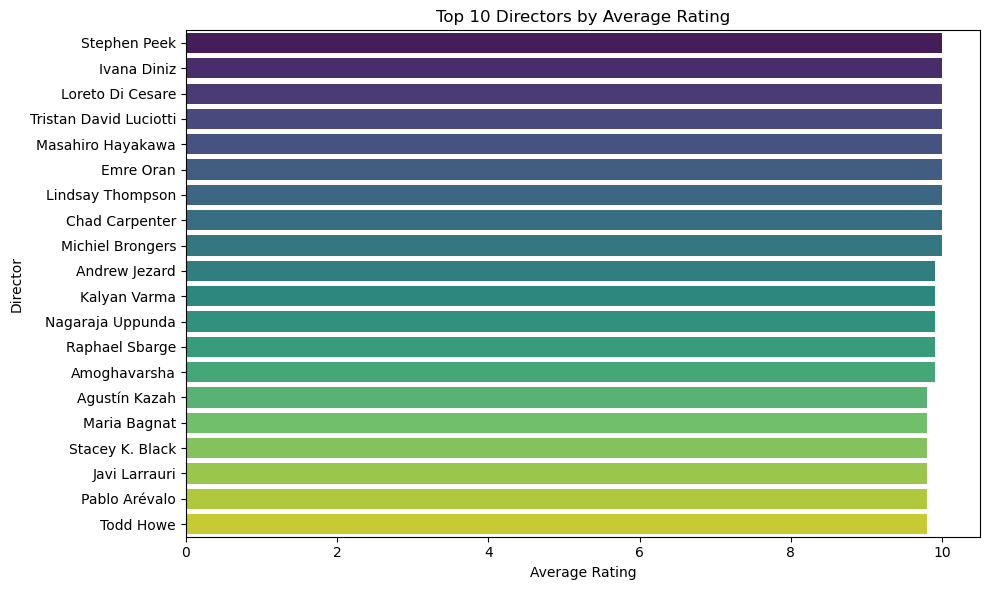

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot for Top Directors by Average Rating
plt.figure(figsize=(10,6))
sns.barplot(data=top_directors, y='primary_name', x='avg_rating', palette='viridis')
plt.title('Top 10 Directors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.tight_layout()
plt.show()


In [53]:
# Merge directors with ratings and persons to get names
directors_ratings = directors.merge(ratings, on='movie_id', how='left').merge(persons, on='person_id', how='left')

# Group by director and calculate avg rating
top_10_directors = (
    directors_ratings.groupby('primary_name')
    .agg(avg_rating=('averagerating', 'mean'), num_movies=('movie_id', 'count'))
    .sort_values(by='avg_rating', ascending=False)
    .head(10)
    .reset_index()
)

print(top_10_directors)


             primary_name  avg_rating  num_movies
0             Ivana Diniz        10.0           1
1            Stephen Peek        10.0           1
2       Masahiro Hayakawa        10.0           1
3               Emre Oran        10.0           1
4        Loreto Di Cesare        10.0           1
5        Lindsay Thompson        10.0           2
6          Chad Carpenter        10.0           1
7        Michiel Brongers        10.0           2
8  Tristan David Luciotti        10.0           1
9            Kalyan Varma         9.9           1


In [54]:
# Merge directors with ratings and persons to get director names
directors_ratings = directors.merge(ratings, on='movie_id', how='left').merge(persons, on='person_id', how='left')

# Group by director to get average rating and movie count
directors_stats = (
    directors_ratings.groupby('primary_name')
    .agg(
        avg_rating=('averagerating', 'mean'),
        movie_count=('movie_id', 'count')
    )
    .reset_index()
)

# Filter directors with more than 2 movies
directors_filtered = directors_stats[directors_stats['movie_count'] > 2]

# Get top 10 directors by avg rating among those with >2 movies
top_10_directors = directors_filtered.sort_values(by='avg_rating', ascending=False).head(10)

print(top_10_directors)


           primary_name  avg_rating  movie_count
43392     Javi Larrauri         9.8            5
102530      Will Watson         9.7            3
95851     Taylor Morden         9.6            3
46775          Joe York         9.6            3
10349     Bart Hölscher         9.6            5
20430    D. Todd Deeken         9.5            3
65895    Mattia Colombo         9.5            4
27397   Edward Jeffries         9.4            4
52848       Kate Gorman         9.4            3
77360       Pedro Jorge         9.4            3


In [55]:
# Merge directors with persons to get director names
directors_with_names = directors.merge(persons, on='person_id', how='left')

# Count number of movies per director
director_movie_counts = (
    directors_with_names.groupby('primary_name')
    .agg(movie_count=('movie_id', 'count'))
    .reset_index()
)

# Get top 10 directors by number of movies
top_10_directors_by_count = director_movie_counts.sort_values(by='movie_count', ascending=False).head(10)

print(top_10_directors_by_count)


           primary_name  movie_count
74823        Omer Pasha           62
56592       Larry Rosen           53
80450     Rajiv Chilaka           49
92698     Stephan Düfel           48
35315      Graeme Duane           45
36392    Gérard Courant           44
18968     Claudio Costa           42
71982  Nayato Fio Nuala           41
26708   Dustin Ferguson           39
89201         Sergey A.           39


In [75]:
import pandas as pd

# Sample data frames you provided (replace with your full data)
movie_basics = pd.DataFrame({
    'movie_id': ['tt0063540', 'tt0066787', 'tt0069049', 'tt0069204', 'tt0100275'],
    'primary_title': ['Sunghursh', 'One Day Before the Rainy Season', 'The Other Side of the Wind', 'Sabse Bada Sukh', 'The Wandering Soap Opera'],
    'genres': ['Action,Crime,Drama', 'Biography,Drama', 'Drama', 'Comedy,Drama', 'Comedy,Drama,Fantasy']
})

movie_ratings = pd.DataFrame({
    'movie_id': ['tt0063540', 'tt0066787', 'tt0069049', 'tt0069204', 'tt0100275'],
    'averagerating': [7.2, 6.8, 7.5, 6.0, 7.0]
})

# Merge ratings with movie basics
df = pd.merge(movie_basics, movie_ratings, on='movie_id', how='inner')

# Expand genres into separate rows
df_expanded = df.assign(genres=df['genres'].str.split(',')).explode('genres')

# Strip whitespace from genres
df_expanded['genres'] = df_expanded['genres'].str.strip()

# Find the top rated movie per genre
top_movies_by_genre = df_expanded.loc[df_expanded.groupby('genres')['averagerating'].idxmax()]

# Select relevant columns and sort by genre
top_movies_by_genre = top_movies_by_genre[['genres', 'primary_title', 'averagerating']].sort_values('genres')

print(top_movies_by_genre)


      genres                    primary_title  averagerating
0     Action                        Sunghursh            7.2
0     Action                        Sunghursh            7.2
1  Biography  One Day Before the Rainy Season            6.8
4     Comedy         The Wandering Soap Opera            7.0
4     Comedy         The Wandering Soap Opera            7.0
0      Crime                        Sunghursh            7.2
0      Crime                        Sunghursh            7.2
0      Drama                        Sunghursh            7.2
1      Drama  One Day Before the Rainy Season            6.8
4      Drama         The Wandering Soap Opera            7.0
0      Drama                        Sunghursh            7.2
2      Drama       The Other Side of the Wind            7.5
4      Drama         The Wandering Soap Opera            7.0
4    Fantasy         The Wandering Soap Opera            7.0
4    Fantasy         The Wandering Soap Opera            7.0


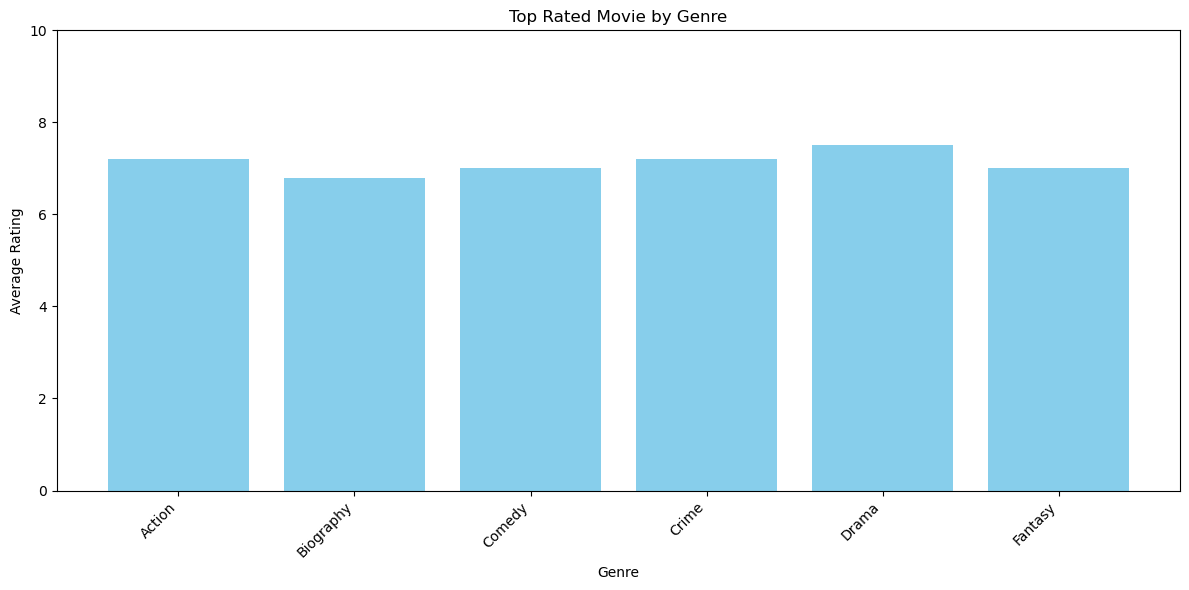

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(top_movies_by_genre['genres'], top_movies_by_genre['averagerating'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Top Rated Movie by Genre')
plt.ylim(0, 10)  # Ratings typically go from 0 to 10
plt.tight_layout()
plt.show()


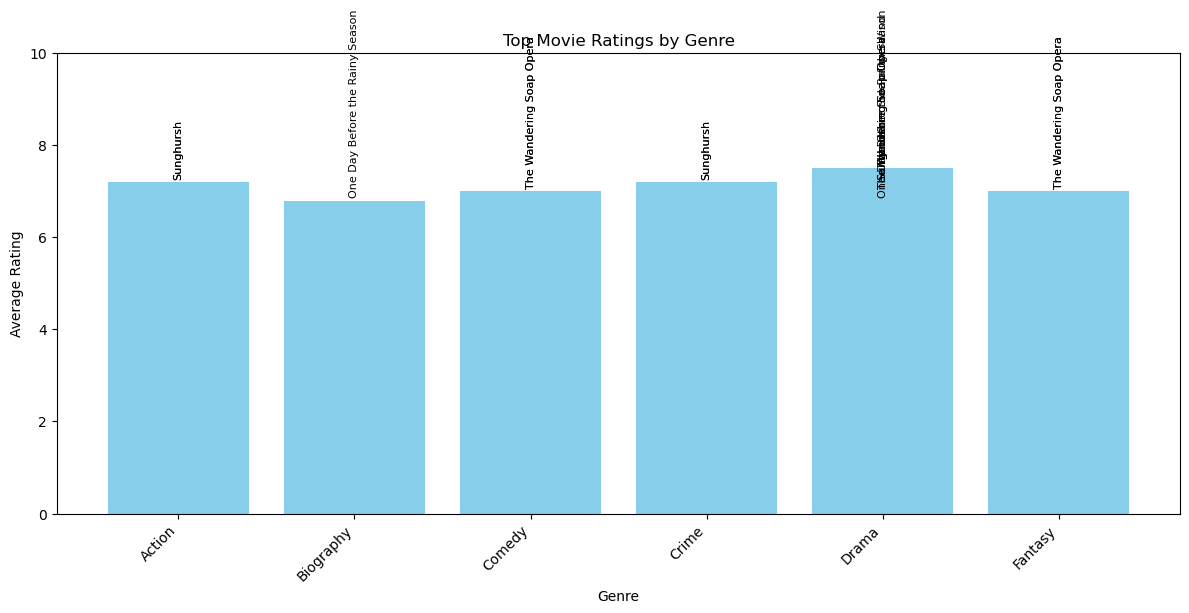

In [58]:
import matplotlib.pyplot as plt

# Assuming `top_movies_by_genre` DataFrame from previous code is available

plt.figure(figsize=(12, 6))
plt.bar(top_movies_by_genre['genres'], top_movies_by_genre['averagerating'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Top Movie Ratings by Genre')
plt.ylim(0, 10)
plt.tight_layout()

# Add movie titles as labels on top of the bars
for idx, row in top_movies_by_genre.iterrows():
    plt.text(row['genres'], row['averagerating'] + 0.1, row['primary_title'], rotation=90, fontsize=8, ha='center')

plt.show()


In [71]:
# Check column names
print(directors.columns)
print(actors.columns)
print(ratings.columns)
print(revenue.columns)
print(writers.columns)
print(movie_basics.columns)
print(persons.columns)
print(principals.columns)


Index(['movie_id', 'person_id'], dtype='object')
Index(['movie_id', 'ordering', 'person_id', 'category', 'characters'], dtype='object')
Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')
Index(['title', 'domestic_gross($)', 'worldwide_gross($)'], dtype='object')
Index(['movie_id', 'person_id'], dtype='object')
Index(['movie_id', 'primary_title', 'genres'], dtype='object')
Index(['person_id', 'primary_name', 'primary_profession'], dtype='object')
Index(['movie_id', 'ordering', 'person_id', 'category'], dtype='object')


In [110]:
# TMDb genre mapping (you can update this dictionary as per TMDb API)
tmdb_genre_dict = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}


In [111]:
# Convert genre_ids string (if stored as string) to list (if needed)
import ast

# If genre_ids are string representation of list, parse them
if isinstance(tmdb.loc[0, 'genre_ids'], str):
    tmdb['genre_ids'] = tmdb['genre_ids'].apply(ast.literal_eval)

# Map genre IDs to names, store as list of genre names in new column 'tmdb_genres'
tmdb['tmdb_genres'] = tmdb['genre_ids'].apply(lambda ids: [tmdb_genre_dict.get(i, 'Unknown') for i in ids])


In [112]:
full_df = pd.merge(
    movie_basics,
    tmdb[['title', 'tmdb_genres']],
    left_on='primary_title',
    right_on='title',
    how='inner'  # only keep matched titles
)

print(f"Merged dataframe shape: {full_df.shape}")
full_df.head()


Merged dataframe shape: (23263, 8)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title,tmdb_genres
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,1970-01-01 00:00:00.000002,122.0,Drama,The Other Side of the Wind,"[Comedy, Drama]"
1,tt0112502,Bigfoot,Bigfoot,1970-01-01 00:00:00.000002,87.0,"Horror,Thriller",Bigfoot,"[Horror, Science Fiction, Adventure]"
2,tt0192528,Heaven & Hell,Reverse Heaven,1970-01-01 00:00:00.000002,104.0,Drama,Heaven & Hell,[Drama]
3,tt0249516,Foodfight!,Foodfight!,1970-01-01 00:00:00.000002,91.0,"Action,Animation,Comedy",Foodfight!,"[Animation, Action, Comedy, Family]"
4,tt0255820,Return to Babylon,Return to Babylon,1970-01-01 00:00:00.000002,75.0,"Biography,Comedy,Drama",Return to Babylon,"[Comedy, Drama]"


In [113]:
full_df = pd.merge(
    full_df,
    revenue[['title', 'worldwide_gross($)']],
    left_on='primary_title',
    right_on='title',
    how='left'  # keep all movies from merged df, some may not have revenue
)

# Check missing revenue rows
print(f"Rows with missing revenue: {full_df['worldwide_gross($)'].isna().sum()}")


Rows with missing revenue: 19162


In [114]:
# Fill missing genres with empty string and split
full_df['genres_list'] = full_df['genres'].fillna('').str.split(',')

# Explode genres
exploded_basic = full_df.explode('genres_list')

# Strip whitespace
exploded_basic['genres_list'] = exploded_basic['genres_list'].str.strip()

# Remove empty genre rows
exploded_basic = exploded_basic[exploded_basic['genres_list'] != '']


In [115]:
exploded_tmdb = full_df.explode('tmdb_genres')

# Remove unknown or missing genres
exploded_tmdb = exploded_tmdb[
    (exploded_tmdb['tmdb_genres'].notna()) & 
    (exploded_tmdb['tmdb_genres'] != 'Unknown')
]


In [116]:
gross_by_basic_genre = (
    exploded_basic.groupby('genres_list')['worldwide_gross($)']
    .sum()
    .reset_index()
    .sort_values('worldwide_gross($)', ascending=False)
)

print(gross_by_basic_genre)


    genres_list  worldwide_gross($)
2     Adventure        2.236959e+11
8         Drama        1.968742e+11
0        Action        1.951874e+11
5        Comedy        1.413095e+11
3     Animation        8.298835e+10
10      Fantasy        7.967163e+10
24     Thriller        7.689815e+10
20       Sci-Fi        7.619813e+10
7   Documentary        6.813352e+10
9        Family        5.508586e+10
19      Romance        4.565271e+10
13       Horror        4.478243e+10
6         Crime        3.906136e+10
4     Biography        3.381541e+10
16      Mystery        2.528269e+10
15      Musical        1.905305e+10
12      History        1.819440e+10
22        Sport        1.334061e+10
14        Music        8.757444e+09
25          War        5.060183e+09
26      Western        1.821900e+09
17         News        2.638716e+08
1         Adult        0.000000e+00
18   Reality-TV        0.000000e+00
11    Game-Show        0.000000e+00
21        Short        0.000000e+00
23    Talk-Show        0.000

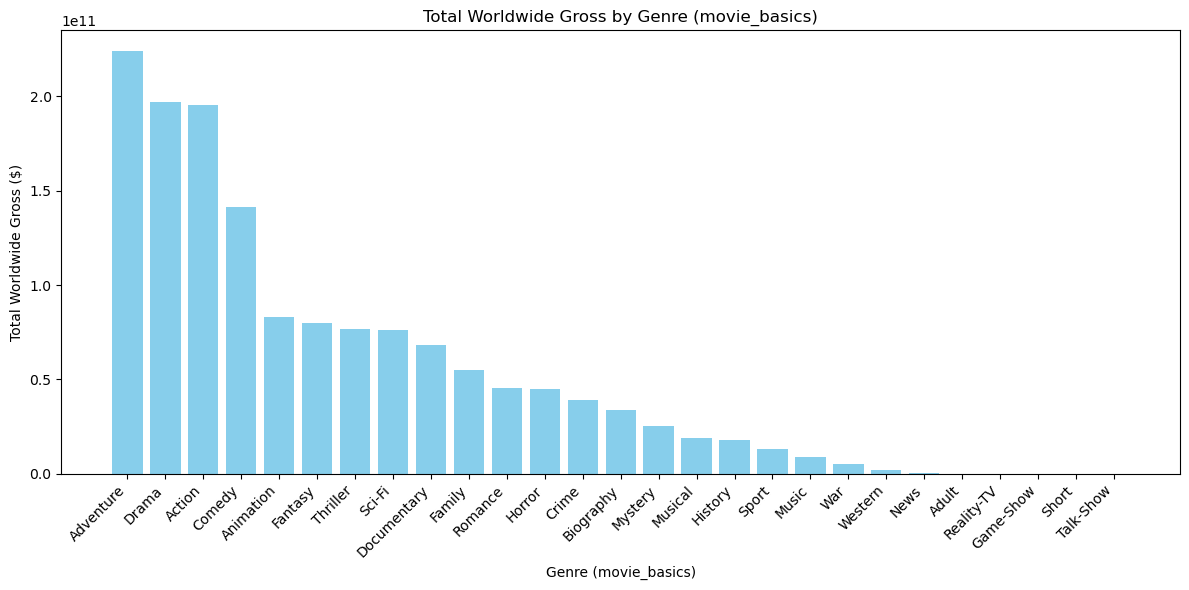

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(gross_by_basic_genre['genres_list'], gross_by_basic_genre['worldwide_gross($)'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre (movie_basics)')
plt.ylabel('Total Worldwide Gross ($)')
plt.title('Total Worldwide Gross by Genre (movie_basics)')
plt.tight_layout()
plt.show()


In [118]:
gross_by_tmdb_genre = (
    exploded_tmdb.groupby('tmdb_genres')['worldwide_gross($)']
    .sum()
    .reset_index()
    .sort_values('worldwide_gross($)', ascending=False)
)

print(gross_by_tmdb_genre)


        tmdb_genres  worldwide_gross($)
1         Adventure        2.048863e+11
6             Drama        1.957134e+11
0            Action        1.930831e+11
3            Comedy        1.610032e+11
7            Family        1.448826e+11
8           Fantasy        1.395830e+11
14  Science Fiction        1.202980e+11
2         Animation        1.045937e+11
16         Thriller        1.029898e+11
13          Romance        6.665323e+10
10           Horror        4.893198e+10
4             Crime        4.887873e+10
12          Mystery        4.057100e+10
17              War        1.139330e+10
9           History        9.271638e+09
5       Documentary        8.248384e+09
11            Music        7.029760e+09
18          Western        6.507228e+09
15         TV Movie        3.781831e+08


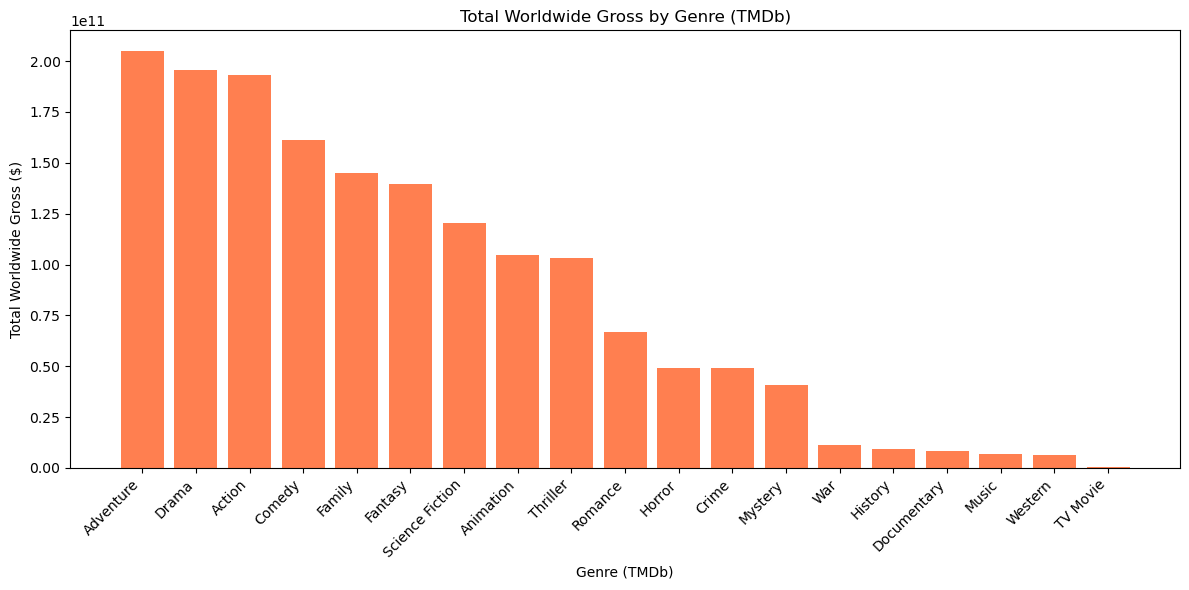

In [119]:
plt.figure(figsize=(12,6))
plt.bar(gross_by_tmdb_genre['tmdb_genres'], gross_by_tmdb_genre['worldwide_gross($)'], color='coral')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre (TMDb)')
plt.ylabel('Total Worldwide Gross ($)')
plt.title('Total Worldwide Gross by Genre (TMDb)')
plt.tight_layout()
plt.show()


Decoded TMDb genre IDs to names.

Merged movie_basics with TMDb and movie revenue on title.

Exploded genres from both sources to have one genre per row.

Grouped by genre and summed worldwide gross.

Plotted total worldwide gross by genre for both movie_basics and TMDb genres.